In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('diabetes.csv')
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())


Dataset shape: (768, 9)

First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print("Dataset info:")
print(data.info())
print("\nBasic statistics:")
print(data.describe())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Basic statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469     

In [6]:
print("Missing values:")
print(data.isnull().sum())
print("\nTarget distribution:")
print(data['Outcome'].value_counts())


Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Target distribution:
Outcome
0    500
1    268
Name: count, dtype: int64


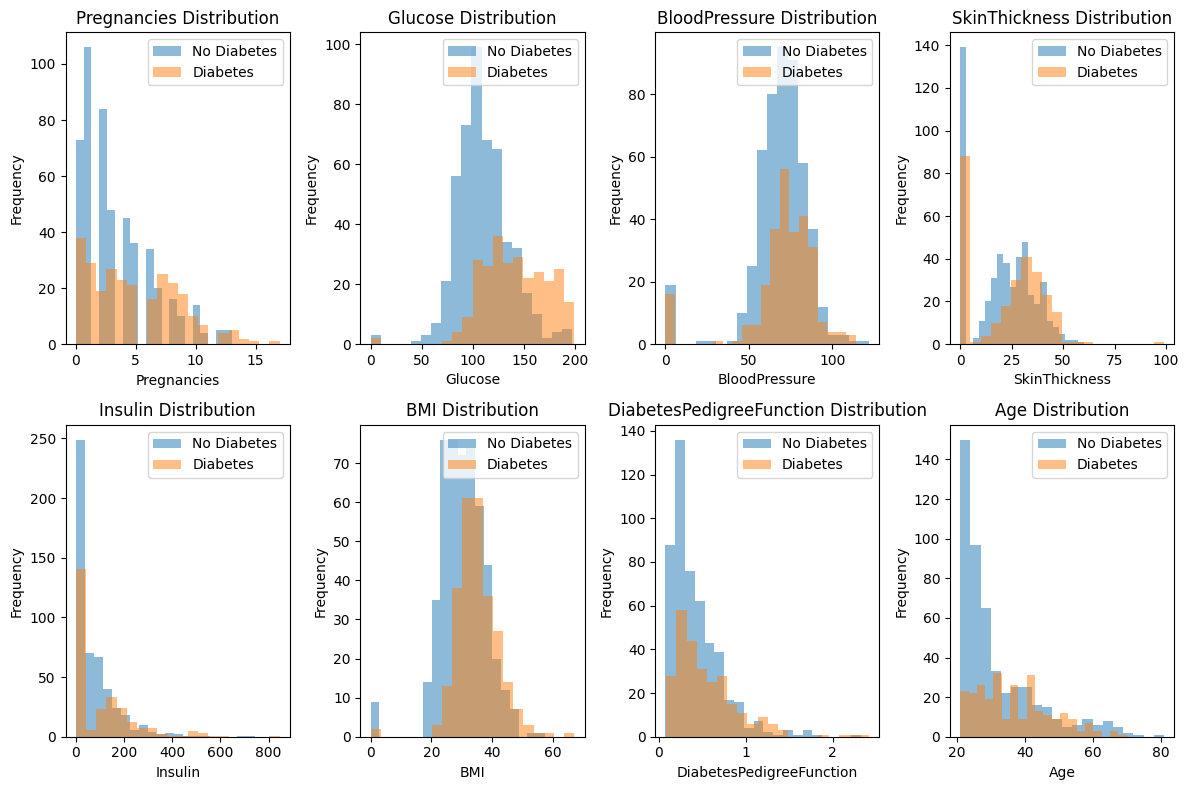

In [7]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[:-1]):
    plt.subplot(2, 4, i+1)
    plt.hist(data[data['Outcome']==0][column], alpha=0.5, label='No Diabetes', bins=20)
    plt.hist(data[data['Outcome']==1][column], alpha=0.5, label='Diabetes', bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.title(f'{column} Distribution')
plt.tight_layout()
plt.show()


In [8]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (768, 8)
Target shape: (768,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (614, 8)
Test set size: (154, 8)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 0.68185612, -0.71402038, -0.61712658, ...,  0.26073561,
        -0.11637247,  0.87809089],
       [-0.52639686, -0.27664283,  0.30191569, ...,  0.48053518,
        -0.954231  , -1.03594038],
       [-0.52639686, -0.40160784, -0.29275872, ..., -0.15300476,
        -0.9245197 , -1.03594038],
       ...,
       [ 1.28598261, -0.80774414,  0.13973176, ...,  0.62275843,
         0.04703966,  2.0961108 ],
       [-0.52639686,  0.78555979,  0.03160914, ..., -0.51502758,
        -0.39268751, -0.33992901],
       [ 1.28598261, -1.46381046,  0.03160914, ...,  0.42881763,
         0.70068816,  0.53008521]])

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with k=5: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy with k=5: 0.6948

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



In [13]:
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_temp = knn_temp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred_temp)
    accuracies.append(acc)
    print(f"k={k}: accuracy={acc:.4f}")


k=1: accuracy=0.6234
k=2: accuracy=0.6558
k=3: accuracy=0.7078
k=4: accuracy=0.7013
k=5: accuracy=0.6948
k=6: accuracy=0.7013
k=7: accuracy=0.6818
k=8: accuracy=0.7078
k=9: accuracy=0.6818
k=10: accuracy=0.6883
k=11: accuracy=0.7078
k=12: accuracy=0.7208
k=13: accuracy=0.7078
k=14: accuracy=0.7273
k=15: accuracy=0.7208
k=16: accuracy=0.7468
k=17: accuracy=0.7532
k=18: accuracy=0.7597
k=19: accuracy=0.7597
k=20: accuracy=0.7597


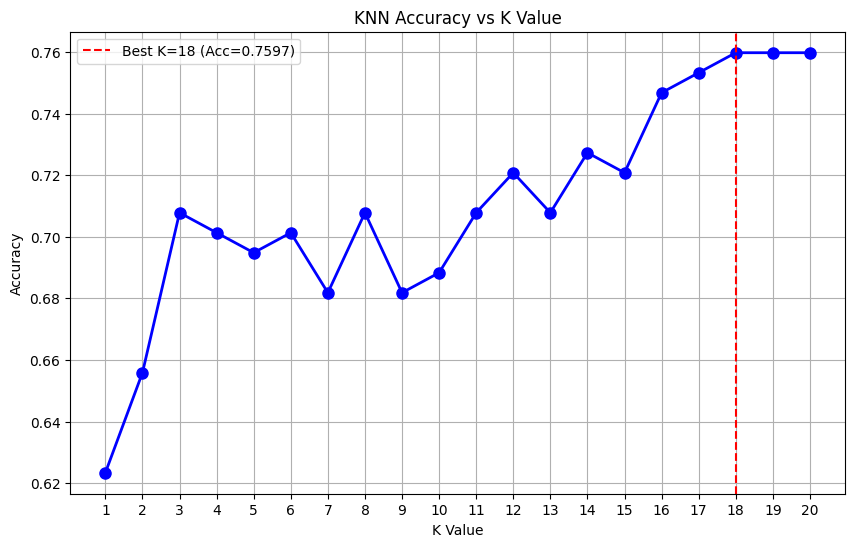

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.title('KNN Accuracy vs K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
best_k = k_values[np.argmax(accuracies)]
best_acc = max(accuracies)
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best K={best_k} (Acc={best_acc:.4f})')
plt.legend()
plt.show()


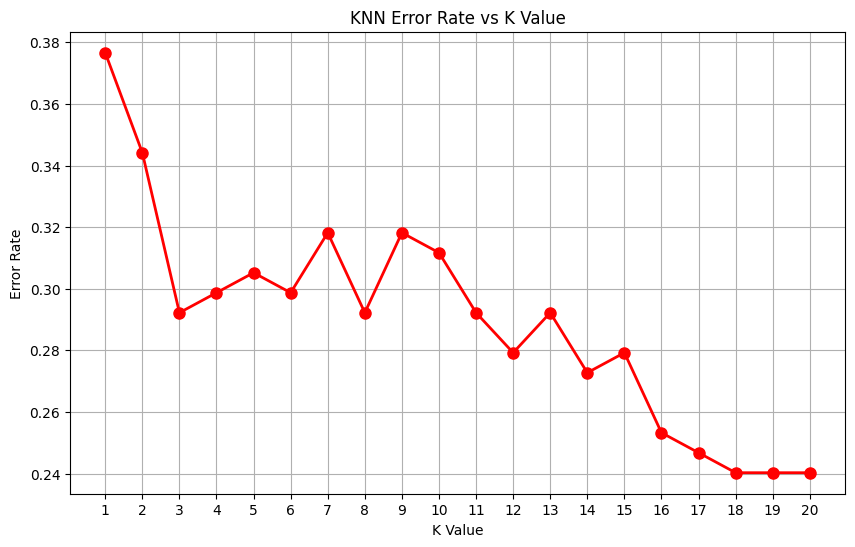

In [15]:
error_rates = [1 - acc for acc in accuracies]
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, 'ro-', linewidth=2, markersize=8)
plt.title('KNN Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xticks(k_values)
plt.show()


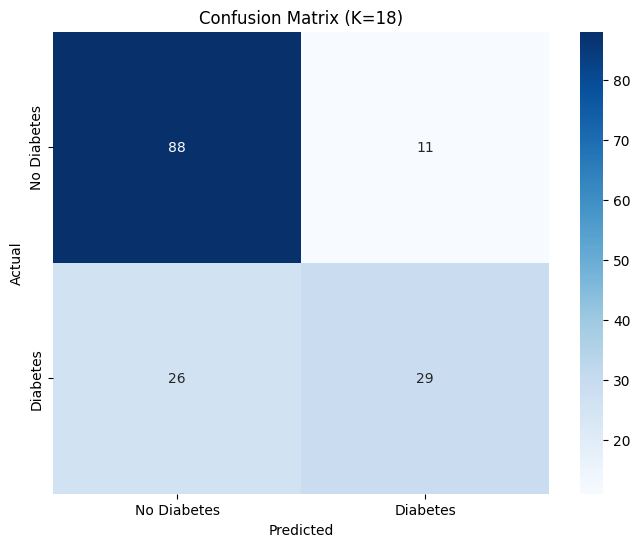

In [16]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title(f'Confusion Matrix (K={best_k})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
print(f"Best K value: {best_k}")
print(f"Best accuracy: {best_acc:.4f}")
print(f"Final accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nFinal Classification Report:")
print(classification_report(y_test, y_pred_best))


Best K value: 18
Best accuracy: 0.7597
Final accuracy: 0.7597

Final Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        99
           1       0.72      0.53      0.61        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.76      0.76      0.75       154



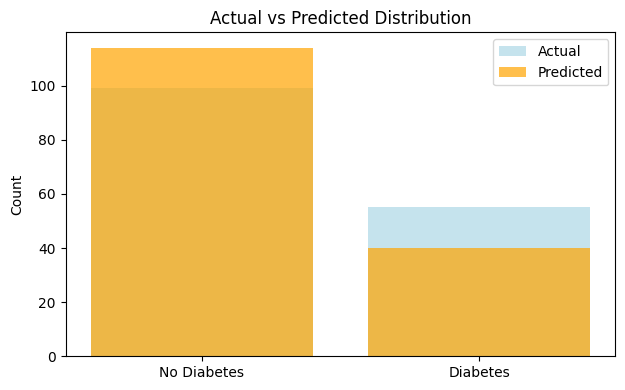

In [19]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(['No Diabetes', 'Diabetes'], y_test.value_counts().sort_index(), alpha=0.7, color='lightblue', label='Actual')
pred_counts = pd.Series(y_pred_best).value_counts().sort_index()
plt.bar(['No Diabetes', 'Diabetes'], pred_counts, alpha=0.7, color='orange', label='Predicted')
plt.title('Actual vs Predicted Distribution')
plt.ylabel('Count')
plt.legend()


plt.tight_layout()
plt.show()
